In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [4]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
x = data['SAT']
y = data['GPA']

In [6]:
x.shape

(84,)

In [13]:
y.shape

(84,)

In [10]:
reg = LinearRegression()

In [11]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
reg.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[1714 1664 1760 1685 1693 1670 1764 1764 1792 1850 1735 1775 1735 1712
 1773 1872 1755 1674 1842 1786 1761 1722 1663 1687 1974 1826 1787 1821
 2020 1794 1769 1934 1775 1855 1880 1849 1808 1954 1777 1831 1865 1850
 1966 1702 1990 1925 1824 1956 1857 1979 1802 1855 1907 1634 1879 1887
 1730 1953 1781 1891 1964 1808 1893 2041 1893 1832 1850 1934 1861 1931
 1933 1778 1975 1934 2021 2015 1997 2020 1843 1936 1810 1987 1962 2050].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
#SKlearn wants a 2D array but we have only one D array.
#There are multiple ways to conver the 1D array to 2D array, 
#But we wil go with the suggesstion given by sklearn

#Note: This is the issue only with single linear regression,
#If we have more than one feature, we do not have this 
#complication

#Also It expects a 2D array only for input features and not
#the dependent variable.

In [17]:
x_mat = x.values.reshape(-1,1)

In [18]:
x_mat.shape

(84, 1)

In [20]:
#Executing the regression again
reg.fit(x_mat, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
#Parameters: 
#Standardization: 
#Also called as feature scalaing or normalization
#basically is it used to put all features on a comman scale.

#by definition: it is the process of subtracting the mean and dividing
#by the standard deviation (It is a type of normalization)
#Sometimes standardization and normalization are used 
#inter-changbly. 
#Normalization is used in terms of Regression algos while 
#standardization is used in terms of clustering or other algos


#copy_X: when set to true, it copies the inputs before fitting
#them. Safety net against normalization and other transformations
#that are done by sklearn on inputs while creating an algo

#fit_intercept: In statsmodels, we had to manually add the constant
#parameter. The fit_intercept precisly takes care of that so 
#that we do not have to add a constant to the model

#n_jobs: Used if we want to parallelise the routines, by default
#only one CPU is used. WE do not see much differences for simple
#examples, This is really useful while working with large data.
#there you can set it to 2,3,5 and so on...

In [22]:
#R-squared
reg.score(x_mat, y)

0.40600391479679765

In [23]:
#Coefficients
reg.coef_

array([0.00165569])

In [24]:
#intercept
reg.intercept_

0.275040299660279

In [25]:
#Making Predictions

In [26]:
reg.predict(1740)

array([3.15593751])

In [27]:
new_data = pd.DataFrame(data=[1740,1760], columns=['SAT'])

In [28]:
new_data

,SAT
0,1740
1,1760


In [29]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [30]:
new_data['Predicted GPA'] = reg.predict(new_data)

In [31]:
new_data

,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


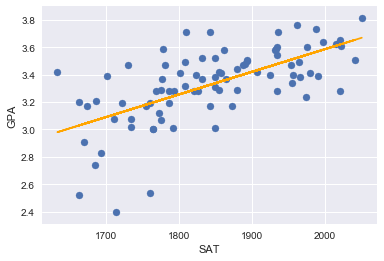

In [35]:
#Plotting the regression
#using the same code
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA')
yhat = reg.coef_*x_mat + reg.intercept_
plt.plot(x, yhat, c='orange', label='regression line')